# RoboTutor Data Analysis

## Importing libraries

In [1]:
import pandas as pd
import sklearn
import numpy as np

In [2]:
from datetime import datetime
import dateutil

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [149]:
import math

## Defining data folders

In [5]:
folder_data = '/home/amogh/Desktop/CMU/LearnLab_Summer_School/Data/'

In [6]:
folder_beta_sites_data = '/home/amogh/Desktop/CMU/LearnLab_Summer_School/Data/beta_sites_upto_27_july/'

In [7]:
path_data_beta_sites = folder_beta_sites_data + 'ds2577_tx_All_Data_4463_2018_0728_005503.txt'

In [46]:
path_data_field = folder_data + 'fieldnew.txt'

## Loading raw data

### Beta Sites

In [47]:
df_data_beta_sites = pd.read_csv(path_data_beta_sites, sep = '\t')

/home/amogh/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7,75,76,79,82,83,84,85,86) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Visualising data**

In [71]:
len(set(df_data_beta_sites['Anon Student Id'].values.tolist()))

229

In [48]:
df_data_beta_sites.head()

,Row,Sample Name,Transaction Id,Anon Student Id,Session Id,Time,Time Zone,Duration (sec),Student Response Type,Student Response Subtype,...,CF (Student School),CF (Student Used Scaffold),CF (Tablet Name),CF (Tablet Number),CF (Total Activity Problems),CF (Tutor Sequence Session),CF (Tutor Sequence User),CF (Unix Epoch),CF (User Id Order),CF (Version)
0,1,All Data,556a357f1676e9f396b472affacf1052,20180421_081922-0-52000266fecfa4e5,52000266fecfa4e5_20180503_095852,2018-05-03 12:59:15,NaN,0,NaN,NaN,...,NaN,NaN,3,52000266fecfa4e5,5.0,1,1,1.525356e+12,2,sw.1.8.9.1
1,2,All Data,19b3b667ff8f23ef0eff507504b00b7e,20180421_081922-0-52000266fecfa4e5,52000266fecfa4e5_20180503_095852,2018-05-03 12:59:20,NaN,5,NaN,NaN,...,NaN,NaN,3,52000266fecfa4e5,5.0,1,1,1.525356e+12,3,sw.1.8.9.1
2,3,All Data,8e06a2e8593ad9e657942d8bed372ee7,20180421_081922-0-52000266fecfa4e5,52000266fecfa4e5_20180503_095852,2018-05-03 12:59:24,NaN,4,NaN,NaN,...,NaN,NaN,3,52000266fecfa4e5,5.0,1,1,1.525356e+12,4,sw.1.8.9.1
3,4,All Data,84127ffce7384bbbb55d6075633012ac,20180421_081922-0-52000266fecfa4e5,52000266fecfa4e5_20180503_095852,2018-05-03 12:59:28,NaN,4,NaN,NaN,...,NaN,NaN,3,52000266fecfa4e5,5.0,1,1,1.525356e+12,5,sw.1.8.9.1
4,5,All Data,a9afc7bf3339a253b07e1ae593a9663b,20180421_081922-0-52000266fecfa4e5,52000266fecfa4e5_20180503_095852,2018-05-03 12:59:55,NaN,27,NaN,NaN,...,NaN,NaN,3,52000266fecfa4e5,9.0,2,2,1.525356e+12,6,sw.1.8.9.1


In [49]:
list_columns_df_beta_sites = df_data_beta_sites.columns.values
list_columns_df_beta_sites

array(['Row', 'Sample Name', 'Transaction Id', 'Anon Student Id',
       'Session Id', 'Time', 'Time Zone', 'Duration (sec)',
       'Student Response Type', 'Student Response Subtype',
       'Tutor Response Type', 'Tutor Response Subtype',
       'Level (Tutor Name)', 'Level (Tutor)', 'Problem Name',
       'Problem View', 'Problem Start Time', 'Step Name',
       'Attempt At Step', 'Is Last Attempt', 'Outcome', 'Selection',
       'Action', 'Input', 'Feedback Text', 'Feedback Classification',
       'Help Level', 'Total Num Hints', 'KC (Tutor)',
       'KC Category (Tutor)', 'KC (Tutor Problem Name)',
       'KC Category (Tutor Problem Name)', 'KC (Village)',
       'KC Category (Village)', 'KC (Matrix)', 'KC Category (Matrix)',
       'KC (Order)', 'KC Category (Order)', 'KC (Channel)',
       'KC Category (Channel)', 'KC (Option Behavior)',
       'KC Category (Option Behavior)', 'KC (Content)',
       'KC Category (Content)', 'KC (Content By Tutor)',
       'KC Category (Content 

### Field Site

In [50]:
df_data_field = pd.read_csv(path_data_field, sep = '\t')

/home/amogh/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3,7,54,55,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [53]:
list_columns_df_field = df_data_field.columns.values
list_columns_df_field

array(['Row', 'Sample Name', 'Transaction Id', 'Anon Student Id',
       'Session Id', 'Time', 'Time Zone', 'Duration (sec)',
       'Student Response Type', 'Student Response Subtype',
       'Tutor Response Type', 'Tutor Response Subtype',
       'Level (Tutor Name)', 'Level (Tutor)', 'Problem Name',
       'Problem View', 'Problem Start Time', 'Step Name',
       'Attempt At Step', 'Is Last Attempt', 'Outcome', 'Selection',
       'Action', 'Input', 'Feedback Text', 'Feedback Classification',
       'Help Level', 'Total Num Hints', 'KC (Tutor)',
       'KC Category (Tutor)', 'KC (Tutor Problem Name)',
       'KC Category (Tutor Problem Name)', 'KC (Village)',
       'KC Category (Village)', 'KC (Matrix)', 'KC Category (Matrix)',
       'KC (Single-KC)', 'KC Category (Single-KC)', 'KC (Unique-step)',
       'KC Category (Unique-step)', 'School', 'Class',
       'CF (Activity Finished)', 'CF (Activity Started)',
       'CF (Attempt Number)', 'CF (Date)', 'CF (Duration sec)',
       'C

In [54]:
list_field_village_names = list(set(df_data_field['KC (Village)']))
list_field_village_names

[128,
 129,
 130,
 133,
 134,
 140,
 114,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 125,
 126]

Target - To get the session frequency and the session duration for all the villages.

## Helper functions (getDateAndTime, getTotalDuration, getTotalUseDays, getTotalUsableDays)

In [55]:
# to get data and time in a tuple from a common string(found in the Time column of the dataframe)
def getDateAndTime(datetime):
    
    """
    Splits a string with date and time and returns them as a tuple
    """
    
    split_list = datetime.split(' ')
    time = split_list[1]
    date = split_list[0]
    return date, time

In [56]:
'%Y-%m-%dT%H:%M:%SZ'

'%Y-%m-%dT%H:%M:%SZ'

In [57]:
df_data_field[df_data_field["Anon Student Id"] == "5A28000396"]["Time"]

169008    2000-01-01 08:11:53
169009    2000-01-01 08:11:54
169010    2000-01-01 08:11:56
169011    2000-01-01 08:11:57
169012    2000-01-01 08:12:02
169013    2000-01-01 08:12:03
169014    2000-01-01 08:12:05
169015    2000-01-01 08:12:06
169016    2000-01-01 08:12:32
169017    2000-01-01 08:12:33
169018    2000-01-01 08:12:34
169019    2000-01-01 08:12:36
169020    2000-01-01 08:12:37
169021    2000-01-01 08:12:38
169022    2000-01-01 08:12:41
169023    2000-01-01 08:12:41
169024    2000-01-01 08:12:42
169025    2000-01-01 08:12:45
169026    2000-01-01 08:12:45
169027    2000-01-01 08:12:46
169028    2000-01-01 08:12:49
169029    2000-01-01 08:12:50
169030    2000-01-01 08:12:50
169031    2000-01-01 08:12:53
169032    2000-01-01 08:12:54
169033    2000-01-01 08:12:54
169034    2000-01-01 08:12:57
169035    2000-01-01 08:12:58
169036    2000-01-01 08:12:59
169037    2000-01-01 08:13:02
                 ...         
181003    2018-06-15 22:13:20
181004    2018-06-15 22:13:20
181005    

In [58]:
def getTotalDuration(df_data, village, student_id):
    
    """
    Input: data dataframe, village name, student_id
    Returns the total amount of usage in seconds for the tutor across all sessions in the data for a particular student in a village.
    """
    
    df_student = df_data[(df_data['KC (Village)'] == village) & (df_data['Anon Student Id'] == student_id)]
    list_sessions = list(set(df_student['Session Id']))
    list_sess_dur = []
    sess_dur_sec = 0
    for sess in list_sessions:
        df_sess = df_student [df_student['Session Id'] == sess]
        DT = '%Y-%m-%d %H:%M:%S'
        list_times = list(df_sess['Time'])
        list_times = sorted(list_times, key=lambda x: datetime.strptime(x, DT))
        diff_time = datetime.strptime(list_times[-1],DT) - datetime.strptime(list_times[0],DT)
        list_sess_dur.append(diff_time.seconds)
        if(diff_time.seconds > 50000):
            print("\n DEBUG session duration>50000 in getTotalDuration for village {}, student id {}, session id {}".format(village, student_id, sess))
            print("start and end times are: ",datetime.strptime(list_times[0],DT),datetime.strptime(list_times[-1],DT))
        sess_dur_sec += diff_time.seconds
    if(sess_dur_sec/60. > 1000):
        print("\n DEBUG Total duration>1000 min in getTotalDuration for village {}, student id {}".format(village, student_id))
        print("number of sessions are: {} over {} days, with a maximum usage of : {} minutes".format(len(list_sessions), len(list(set(df_student['CF (Date)']))),max(list_sess_dur)/60))
        
#     print("the tutor was used for {} seconds which is {} minutes".format(sess_dur_sec,sess_dur_sec/60))        
    return sess_dur_sec


In [59]:
getTotalDuration(df_data_field,129 ,"5A28000396")/60.

601.1666666666666

In [60]:
def getTotalUseDays(df_data, village, student_id):
    
    """
    Input: data dataframe, village name, student_id, function to separate date and time
    Returns the total number of days tutor was used for a particular student in a village.
    """
    
    df_student = df_data[(df_data['KC (Village)'] == village) & (df_data['Anon Student Id'] == student_id)]
    list_dates = list(set(df_student['CF (Date)']))
    list_dates = [d for d in list_dates if datetime.strptime(d, "%Y-%m-%d").date() > datetime.strptime('2018-01-01', "%Y-%m-%d").date()]
    no_use_days = len(list_dates)
    if no_use_days == 0:
        no_use_days = 1
#     print("the tutor was used for {} days".format(no_use_days))    
    return no_use_days

In [61]:
def getTotalUsableDays(df_data, village, student_id):
    
    """
    Input: data dataframe, village name, student_id
    Returns the total number of days tutor could've been used for a particular student in a particular village.
    """
    
    df_student = df_data[(df_data['KC (Village)'] == village) & (df_data['Anon Student Id'] == student_id)]
    list_dates = list(set(df_student['CF (Date)']))
    list_dates = sorted(list_dates, key=lambda x:datetime.strptime(x, "%Y-%m-%d"))
    list_dates = [d for d in list_dates if datetime.strptime(d, "%Y-%m-%d").date() > datetime.strptime('2018-01-01', "%Y-%m-%d").date()]
    if len(list_dates)>0:
        first_use_date = list_dates[0]
        last_use_date = list_dates[-1]
        no_usable_days = 1 + (datetime.strptime(last_use_date,"%Y-%m-%d") - datetime.strptime(first_use_date,"%Y-%m-%d")).days
    else:
        no_usable_days = 1
    if no_usable_days > 120:
        print("\n DEBUG no_usable_days > 120")
        print("first and last dates of use are: ", first_use_date, last_use_date)
#     print("the tutor was usable over {} days".format(no_usable_days))    
    return no_usable_days

In [62]:
getTotalUsableDays(df_data_field, 129, "5A28000396")

2

In [31]:
def getTotalUsableDays(df_data, village, student_id):
    
    """
    Input: data dataframe, village name, student_id
    Returns the total number of days tutor could've been used for a particular student in a particular village.
    """
    
    df_student = df_data[(df_data['KC (Village)'] == village) & (df_data['Anon Student Id'] == student_id)]
    list_dates = list(set(df_student['CF (Date)']))
    list_dates = sorted(list_dates, key=lambda x:datetime.strptime(x, "%Y-%m-%d"))
    first_use_date = list_dates[0]
    last_use_date = list_dates[-1]
    no_usable_days = 1 + (datetime.strptime(last_use_date,"%Y-%m-%d") - datetime.strptime(first_use_date,"%Y-%m-%d")).days
#     print("the tutor was usable over {} days".format(no_usable_days))    
    return no_usable_days

## Functions to get avg session duration and average session frequency

In [63]:
def getAvgSessionDuration(df_data, village, student_id):
    
    """
    Input: data, village name, student id
    Returns the avg session duration obtained by dividing total use time by no of days that the tutor was used by a particular student in a particular village
    """
    
    total_duration = getTotalDuration(df_data, village, student_id)
    total_use_days = getTotalUseDays(df_data, village, student_id)
    if(total_use_days) == 0:
        total_use_days = 1
    avg_session_duration = total_duration/total_use_days
    
    if avg_session_duration/60. > 360:
        print("\n DEBUG Avg Session Duration")
        print("avg session duration >360 minutes ie: ", avg_session_duration/60.,"for village: ", village,"student id: ", student_id, " and total use days are: ", total_use_days," and the total duration in minutes is ", total_duration/60)
        
    return avg_session_duration

In [64]:
def getAvgSessionFrequency(df_data, village, student_id):

    """
    Input: data, village name, student id
    Returns the avg session frequency obtained by dividing total number of days used divided by number of days it could have been used by a particular student in a particular village
    """
    
    total_days_used = getTotalUseDays(df_data, village, student_id)
    total_days_usable = getTotalUsableDays(df_data, village, student_id)
    if(total_days_usable) == 0:
        print("\n DEBUG Avg Session Frequency")
        print("The total usable days computed is 0 for village: ", village, " student id: ", student_id)
    if(total_days_usable) > 120:
        print("\n DEBUG Avg Session Frequency")
        print("The total usable days computed is > 120 ie: ",total_days_usable," for village: ", village, " student id: ", student_id)
    avg_session_frequency = total_days_used / total_days_usable
    return avg_session_frequency

In [65]:
def getDurationFrequencyInVillage(df_data, village):
    list_children = list(set(df_data[df_data['KC (Village)'] == village] ['Anon Student Id']))
    print("Village {} has {} student ids".format(village, len(list_children)))
    list_avg_session_duration = [getAvgSessionDuration(df_data, village, student_id) for student_id in list_children]
    list_avg_session_frequency = [getAvgSessionFrequency(df_data, village, student_id) for student_id in list_children]
    return list_avg_session_duration, list_avg_session_frequency

## Visualising scatters for villages

In [66]:
list_villages_beta = list(set(df_data_beta_sites['KC (Village)']))
list_villages_field = list(set(df_data_field['KC (Village)']))

In [72]:
dic_village_freqdur_beta_sites = {village:getDurationFrequencyInVillage(df_data_beta_sites,village) for village in list_villages_beta}

Village Bagamoyo has 109 student ids

 DEBUG session duration>50000 in getTotalDuration for village Bagamoyo, student id 20180423_182142-2-52009e8afef694ad, session id 52009e8afef694ad_20180425_182452
start and end times are:  2018-04-25 14:25:07 2018-04-28 13:21:46

 DEBUG Total duration>1000 min in getTotalDuration for village Bagamoyo, student id 20180423_182142-2-52009e8afef694ad
number of sessions are: 8 over 4 days, with a maximum usage of : 1376.65 minutes

 DEBUG session duration>50000 in getTotalDuration for village Bagamoyo, student id 20180516_120752-15-5B02000315, session id 5B02000315_20180516_124545
start and end times are:  2018-05-16 08:45:58 2018-05-17 07:40:41

 DEBUG Total duration>1000 min in getTotalDuration for village Bagamoyo, student id 20180516_120752-15-5B02000315
number of sessions are: 5 over 2 days, with a maximum usage of : 1374.7166666666667 minutes

 DEBUG Avg Session Duration
avg session duration >360 minutes ie:  721.2166666666667 for village:  Bagamo

In [68]:
dic_village_freqdur_field = {village:getDurationFrequencyInVillage(df_data_field,village) for village in list_villages_field}

Village 128 has 15 student ids

 DEBUG Avg Session Duration
avg session duration >360 minutes ie:  509.1666666666667 for village:  128 student id:  6111002085  and total use days are:  1  and the total duration in minutes is  509.1666666666667
Village 129 has 11 student ids

 DEBUG session duration>50000 in getTotalDuration for village 129, student id 5B19001335, session id 5B19001335_20180617_160553
start and end times are:  2018-06-17 16:10:00 2018-06-18 06:36:40

 DEBUG Total duration>1000 min in getTotalDuration for village 129, student id 5B19001335
number of sessions are: 63 over 9 days, with a maximum usage of : 866.6666666666666 minutes

 DEBUG Avg Session Duration
avg session duration >360 minutes ie:  433.3 for village:  129 student id:  5B19001335  and total use days are:  4  and the total duration in minutes is  1733.2

 DEBUG session duration>50000 in getTotalDuration for village 129, student id 6116001314, session id 6116001314_20180617_185153
start and end times are:  20


 DEBUG Avg Session Duration
avg session duration >360 minutes ie:  452.35833333333335 for village:  117 student id:  6116002824  and total use days are:  6  and the total duration in minutes is  2714.15

 DEBUG session duration>50000 in getTotalDuration for village 117, student id 5A28000198, session id 5A28000198_20180614_163633
start and end times are:  2018-06-14 16:37:06 2018-06-15 15:11:33

 DEBUG session duration>50000 in getTotalDuration for village 117, student id 5A28000198, session id 5A28000198_20180616_124553
start and end times are:  2018-06-16 12:46:09 2018-06-17 06:20:32

 DEBUG session duration>50000 in getTotalDuration for village 117, student id 5A28000198, session id 5A28000198_20180620_152315
start and end times are:  2018-06-20 15:16:40 2018-06-21 07:06:40

 DEBUG Total duration>1000 min in getTotalDuration for village 117, student id 5A28000198
number of sessions are: 76 over 12 days, with a maximum usage of : 1354.45 minutes

 DEBUG Avg Session Duration
avg sess


 DEBUG session duration>50000 in getTotalDuration for village 121, student id 5B20001355, session id 5B20001355_20180619_194157
start and end times are:  2018-06-19 19:50:00 2018-06-20 18:53:20

 DEBUG session duration>50000 in getTotalDuration for village 121, student id 5B20001355, session id 5B20001355_20180623_195116
start and end times are:  2018-06-23 19:56:40 2018-06-25 19:43:20

 DEBUG Total duration>1000 min in getTotalDuration for village 121, student id 5B20001355
number of sessions are: 28 over 10 days, with a maximum usage of : 1426.6666666666667 minutes

 DEBUG Avg Session Duration
avg session duration >360 minutes ie:  476.3333333333333 for village:  121 student id:  5B20001355  and total use days are:  10  and the total duration in minutes is  4763.333333333333

 DEBUG Avg Session Duration
avg session duration >360 minutes ie:  465.9 for village:  121 student id:  5B20002310  and total use days are:  2  and the total duration in minutes is  931.8

 DEBUG session durati

Village 119 has 16715 

In [158]:
#no of legit anonymous ids
16861 - 16715

146

In [155]:
# total df shape
df_data_field.shape

(1162417, 68)

In [156]:
#total anonymous id 
len(list(set(df_data_field['Anon Student Id'])))

16861

In [142]:
#no of elements whose frequency is 1
np.array([(np.array(e) == 1.0).sum() for e in ([a[1] for a in dic_village_freqdur_field.values()])]).sum()

16818

In [ ]:
#


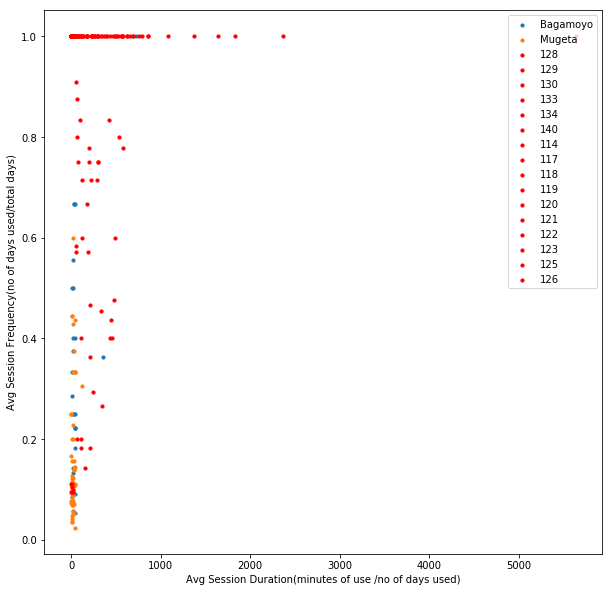

In [115]:
colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired   
main_figure = plt.figure(figsize=(10,10))
ax1 = main_figure.add_subplot(111)

for village in list_villages_beta:
    dur, freq = dic_village_freqdur_beta_sites[village]
    dur = [d/60 for d in dur]
    ax1.scatter(dur,freq, s=10, label=village)

for village in list_villages_field:
    dur, freq = dic_village_freqdur_field[village]
    dur = [d/60 for d in dur]
    ax1.scatter(dur,freq, s=10, c='r',label=village)
ax1.legend(loc=1)
#setting colors
colors = [colormap(i) for i in np.linspace(0, 1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
plt.xlabel('Avg Session Duration(minutes of use /no of days used)')
plt.ylabel('Avg Session Frequency(no of days used/total days)')
plt.show()

## Calculating Metrics (Mean, variance)

In [ ]:
def getUsageMetrics(df_data, village):
    
    """
    Takes in the dataframe for the data and village name, calculates metrics (mean, std) for the village
    """
    
    list_avg_session_duration, list_avg_session_frequency = getDurationFrequencyInVillage(df_data, village)
    array_avg_session_duration_minutes = np.array(list_avg_session_duration)/60
    array_avg_session_frequency = np.array(list_avg_session_frequency)
    mean_session_duration = np.mean(array_avg_session_duration_minutes)
    mean_session_frequency = np.mean(array_avg_session_frequency)
    std_session_duration = np.std(array_avg_session_duration_minutes)
    std_session_frequency = np.std(array_avg_session_frequency)
    print(mean_session_duration, mean_session_frequency, std_session_duration, std_session_frequency)

In [71]:
dic_village_freqdur_field

{128: ([15500.0,
   30550.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   11000.0,
   1000.0,
   11000.0,
   0.0,
   8000.0,
   1000.0,
   0.0,
   0.0],
  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.1, 1.0, 1.0]),
 129: ([25998.0,
   18035.0,
   14000.0,
   26457.14285714286,
   13222.666666666666,
   12714.285714285714,
   14000.0,
   6000.0,
   12931.75,
   33975.0,
   4833.333333333333],
  [1.0,
   1.0,
   1.0,
   0.4375,
   1.0,
   0.4666666666666667,
   1.0,
   1.0,
   0.36363636363636365,
   1.0,
   0.75]),
 130: ([2058.0], [1.0]),
 133: ([2000.0, 500.0, 0.0, 1500.0, 5000.0, 1000.0, 0.0, 0.0, 1000.0],
  [1.0,
   0.09523809523809523,
   0.09523809523809523,
   0.09523809523809523,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0]),
 134: ([11500.0,
   11714.285714285714,
   32250.0,
   6460.333333333333,
   29600.0,
   20622.0,
   141858.0,
   0.0,
   109849.0,
   25808.75,
   19774.0,
   0.0,
   22400.0,
   23303.0,
   6200.0,
   31333.333333333332],
  [0.5714285714285714,

In [ ]:
getTotalUsableDays(df_data_beta_sites, "Bagamoyo", "20180428_102608-3-52009f57fe7e943d")

In [ ]:
a getUsageMetrics(df_data_beta_sites, 'Bagamoyo')

In [66]:
df_data_beta_sites["CF (Student)"]

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23        NaN
24        NaN
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
         ... 
451578    NaN
451579    NaN
451580    NaN
451581    NaN
451582    NaN
451583    NaN
451584    NaN
451585    NaN
451586    NaN
451587    NaN
451588    NaN
451589    NaN
451590    NaN
451591    NaN
451592    NaN
451593    NaN
451594    NaN
451595    NaN
451596    NaN
451597    NaN
451598    NaN
451599    NaN
451600    NaN
451601    NaN
451602    NaN
451603    NaN
451604    NaN
451605    NaN
451606    NaN
451607    NaN
Name: CF (Student), Length: 451608, dtype: object

In [ ]:
ds

## Defining a dataframe for each of the villages

In [ ]:
dic_village_df_metrics = {}

In [ ]:
df

## Debug: 

### Debugging expressions from the data

In [10]:
list_villages = list(set(df_data_beta_sites['KC (Village)']))
list_villages

['Mugeta', 'Bagamoyo']

In [97]:
x,y = getDurationFrequencyInVillage(df_data_beta_sites,"Bagamoyo")

Village Bagamoyo has 109 student ids


In [105]:
l = [a/60 for a in x]

### Visualisations

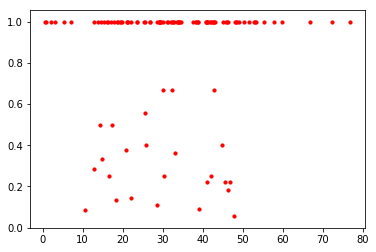

In [106]:
colormap = plt.cm.gist_ncar
main_figure = plt.figure()
ax1 = main_figure.add_subplot(111)
ax1.scatter(l,y, s=10, c='r', label='first')
plt.show()

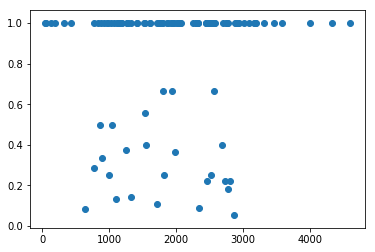

In [86]:
plt.scatter(x,y)

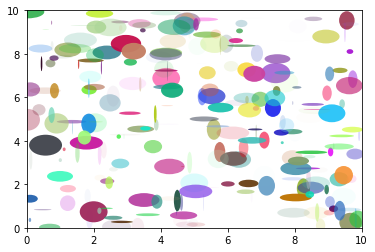

In [59]:
NUM = 250

ells = [Ellipse(xy=np.random.rand(2) * 10,
                width=np.random.rand(), height=np.random.rand(),
                angle=0)
        for i in range(NUM)]

fig, ax = plt.subplots()

for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(np.random.rand())
    e.set_facecolor(np.random.rand(3))

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

plt.show()

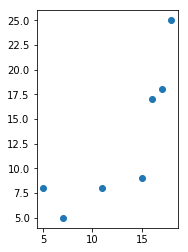

In [52]:
x = [5,7,11,15,16,17,18]
y = [8, 5, 8, 9, 17, 18, 25]
cov = np.cov(x, y)
lambda_, v = np.linalg.eig(cov)
lambda_ = np.sqrt(lambda_)
ax = plt.subplot(111, aspect='equal')
for j in range(1, 4):
    ell = Ellipse(xy=(np.mean(x), np.mean(y)),
                  width=lambda_[0]*j*2, height=lambda_[1]*j*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])))
    ell.set_facecolor('none')
    ax.add_artist(ell)
plt.scatter(x, y)
plt.show()